In [47]:
import numpy as np
import matplotlib.pylab as p



In [48]:
def R_n(n,alpha):
    N=len(n)/2
    nfloat=np.array(n)*1.
    R_n=np.zeros(2*N+1)
    def R_x1(nfloat,alpha):
        N=len(nfloat)
        return 2.**(-1)*(1.-((nfloat)/N)**alpha)
    R_n[n[:N]]=R_x1(nfloat[:N],alpha)
    R_n[n[N:]]=R_x1(2*N-nfloat[N:],alpha) 
    R_n[2*N]=R_n[0]
    return R_n


In [49]:
def S_K(n,alpha):
    
    return np.fft.fft(R_n(n,alpha))
    
    
    

In [50]:
def X_k(k):
    N=len(k)/2
    X_k=np.zeros(2*N)
    ##################
    S_k=S_K(k,alpha)
    phi= np.random.rand(2*N)*2*np.pi
    grandom=np.random.normal(0,1,2*N)
    #print N
    #print k[1:N]
    #print 2*N-k[N+1:]
    def X_k1(k1):          
        ######################
        X_k1=np.exp(+1j*phi[k1])*grandom[k1]*np.sqrt(S_k[k1])
        ######################     
        return X_k1
    
    X_k[k[1:N]]=X_k1(k[1:N])
    
    ######################
    X_k[N]=grandom[N]*np.sqrt(S_k[N])
    #####################
   
    X_k[k[N+1:]]=np.conjugate(X_k1(2*N-np.array(k[N+1:])))    
    return X_k

In [51]:
def x_n(N,alpha):
    n=range(2*N)
    k=range(2*N)
    return np.fft.ifft(X_k(k))

In [53]:
#main
n=range(0,2000)
alpha=0.5
r_m=R_n(n,alpha)
s_k=S_K(n,alpha)
r_t=x_n(2000,1.0)[0:2000]
#plt.plot(r_t-r_t[0])
plt.plot(s_k)
plt.show()

/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [29]:
r_t_allparticles=[]
for particle in range(100):
    r_t=x_n(2000,alpha)[:2000]
    
    r_t_allparticles.append(r_t-r_t[0])
traject=np.array(r_t_allparticles)
    

/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


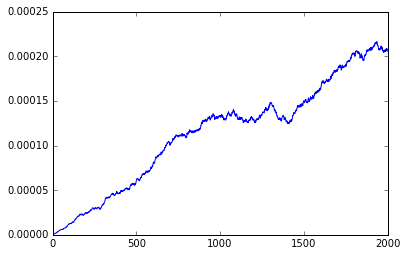

In [131]:
r_t_allparticles_squared=abs(traject)**2
msd=r_t_allparticles_squared.mean(axis=0)

plt.plot(msd)